In [20]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
n_task_per_file = 10
n_files = 30
base_dir = "vary_p_test_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [22]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [23]:
oper_char_df

,Coverage Rate,Length,MSE,Method,p
0,0.600000,4.911924,27.104075,RRT,5
1,0.857143,92.604305,28.042454,Tree-Values,5
2,0.666667,10.117062,26.633459,UV(0.1),5
3,0.800000,4.254264,25.836700,RRT,10
4,1.000000,17.358778,26.952086,Tree-Values,10
...,...,...,...,...,...
85,1.000000,39.314310,30.209927,Tree-Values,10
86,1.000000,12.078846,29.895677,UV(0.1),10
87,0.666667,7.161925,30.768886,RRT,20
88,1.000000,21.977361,33.493035,Tree-Values,20


In [24]:
oper_char_df.index = range(oper_char_df.shape[0])

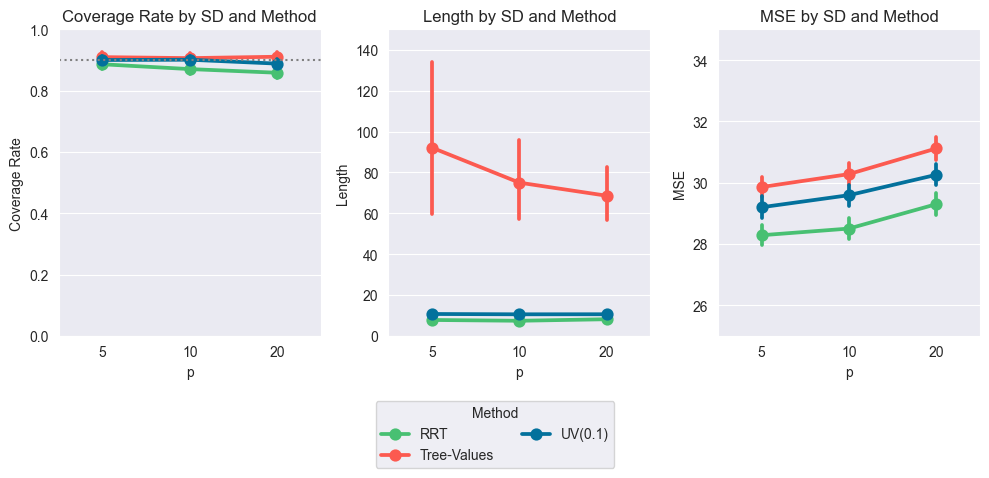

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

my_palette = {"RRT": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='p', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('p')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,150)
    elif metric == "MSE":
        axes[i].set_ylim(25,35)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [26]:
means = oper_char_df.groupby(['Method', "p"])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,Method,p,Coverage Rate,Length,MSE
0,RRT,5,0.886381,7.740329,28.282497
1,RRT,10,0.870659,7.351369,28.500206
2,RRT,20,0.858730,8.099605,29.296894
3,Tree-Values,5,0.909722,92.119356,29.855892
4,Tree-Values,10,0.906468,74.987411,30.277871
5,Tree-Values,20,0.910976,68.583322,31.115702
6,UV(0.1),5,0.900270,10.671354,29.196335
7,UV(0.1),10,0.901206,10.515261,29.590106
8,UV(0.1),20,0.888532,10.543203,30.255506


In [27]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [28]:
oper_char_df[tree_flag].groupby(['p'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,p,proportion_infinity
0,5,0.0
1,10,0.0
2,20,0.0


391.6666666666667